## **00 Project Babynames-Part II-Nicolas**  
**Intro**  
This was the first of the weekly projects of my DataScience Course at SPICED-Academy. The aim of the project was to teach Data Wrangling with Pandas and Data Visualization with matplotlib. Basic Calculations with Numpy and Pattern Matching with Regular Expressions were also applied. The data used in this project were baby names and their frequency of occurancy in the United States over time. The data was obtained from US Social Security Administration https://www.ssa.gov/oact/babynames/limits.html (This Dataset was also once part of a kaggle compatition. IT can be found here https://www.kaggle.com/kaggle/us-baby-names/ .)
For this project I created two notebooks: 
The first shows a generell investigation of the data , e.g. distribution between Genders and Top Names (It can be found here  ....#@Nic), 
in the second my first name , Nicolas, or rather the different versions of if (e.g Nicholas, Nikolas, Nick, etc) was investigated. 

It should be noted that the website states "To safeguard privacy, we exclude from these files certain names that would indicate, or would allow the ability to determine, names with fewer than 5 occurrences in any geographic area."


In [1]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### What do all these men have in common?

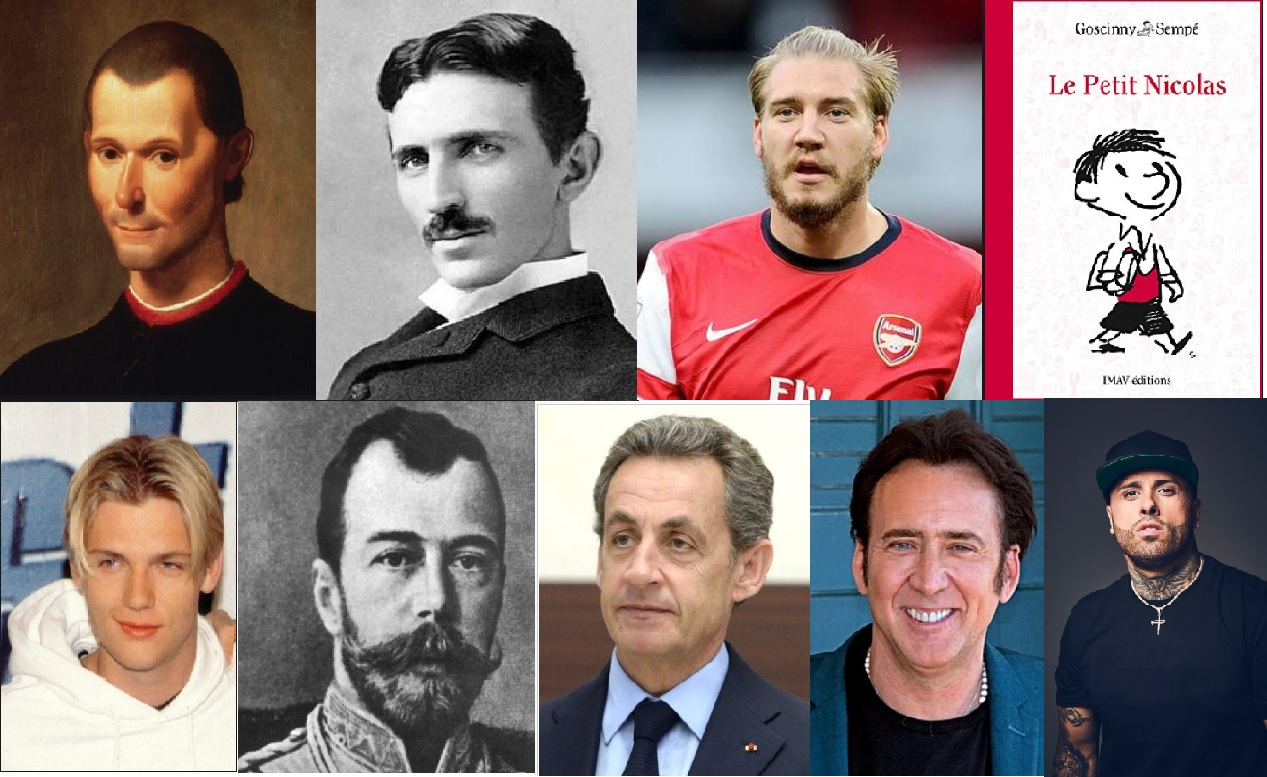

In [2]:
Image(filename = "All_nicolas.jpg") 
#Note all the photos were obtainned from Wikipedia

The men show here are: (from left top to right bottom):


Thus all of their first name have of my first name Nicolas

#### Since there are many version to write my first name 'Nicolas', as seen in the photo e.g. 'Nicholas', 'Nick', Niclas, instead of my name, I analyzed all versions from the name family

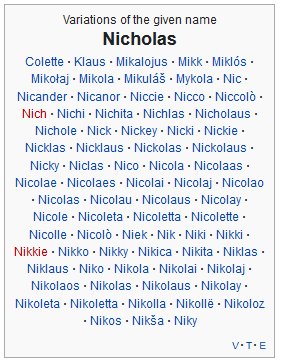

In [3]:
# wikipedia list more board versions https://en.wikipedia.org/wiki/Nicholas#Male_variations
Image(filename ="VariationOfNicolas.png") #("C:\Users\User\Documents\Spiced Academy\names\fotos\Nicolas_family.jpg")
#myImage.show()

In [4]:
# Read in all Years
Years = range(1880, 2018, 1)
data = []
for y in Years:
    fn = f'yob{str(y)}.txt'
    df = pd.read_csv(fn, names = ["FirstName","Sex","Count"])
    df['Year'] = y
    data.append(df)
    
df = pd.concat(data,ignore_index = True)

# Create a DF for Male and for Female
df_m = df[df['Sex']== 'M']
df_f = df[df['Sex']== 'F']

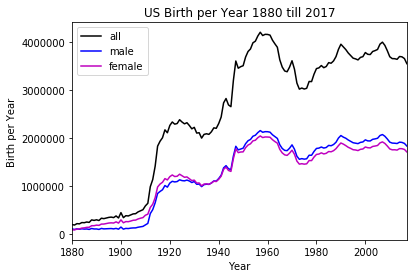

In [5]:
#Total births over time
baby_sum = df.groupby('Year')[['Count']].sum()
baby_sum_m = df_m.groupby('Year')[['Count']].sum()
baby_sum_f = df_f.groupby('Year')[['Count']].sum()
baby_sum.plot.line(c='k')

plt.plot(baby_sum_m.index, baby_sum_m['Count'].values, color='b')
plt.plot(baby_sum_f.index, baby_sum_f['Count'].values, color='m')
plt.xlabel('Year')
plt.ylabel('Birth per Year')
plt.title('US Birth per Year 1880 till 2017')
plt.legend(('all','male','female'))

#### While Wikipedia provided the list above, for my analysis, I use a more narrow definition : to be considered as a Nicolas it has to start with Nic or Nik

In [6]:
# Using regex to find the names
import re
def Matching_ni(fn):
    pattern1 = r"^Nic.*"
    pattern2 = r"^Nik.*"
    nivector = [pattern1 ,pattern2]
    nivector2 = '|'.join(nivector)
#    print(nivector2)
    if re.match(nivector2,fn):
        return True
    else:
        return False 
    
# both sexes
NiData_all = df[df['FirstName'].apply(Matching_ni)]
# male
NiData_m = df_m[df_m['FirstName'].apply(Matching_ni)]
# female
NiData_f = df_f[df_f['FirstName'].apply(Matching_ni)]
#df.apply(re.match(pattern1,df['FirstName']))
NiData_all.head(5)

,FirstName,Sex,Count,Year
1119,Nicholas,M,73,1880
1210,Nick,M,40,1880
3141,Nicholas,M,56,1881
3192,Nick,M,39,1881
5158,Nicholas,M,66,1882


In [7]:
NiData_m.shape

(4090, 4)

### List of different versions of Nicolas

the Dataset contains the following versions


In [8]:
import numpy as np
NiData_m['FirstName'].unique()

array(['Nicholas', 'Nick', 'Nickolas', 'Nicolas', 'Nicola', 'Nicanor',
       'Nichols', 'Nickie', 'Nicklas', 'Nicolo', 'Nicholos', 'Nicklos',
       'Nicky', 'Nicandro', 'Nickey', 'Nickolaus', 'Nicodemus', 'Nickles',
       'Nickoles', 'Nicasio', 'Nikolas', 'Nicki', 'Nikki', 'Niki',
       'Nickola', 'Nicholaus', 'Nicholes', 'Nichlos', 'Nicholis',
       'Nikolaus', 'Nicomedes', 'Nikita', 'Nico', 'Nikolai', 'Nicolaas',
       'Nikola', 'Nic', 'Nicole', 'Nikolaos', 'Nicolai', 'Nicholai',
       'Niko', 'Nikos', 'Nicholus', 'Nicklaus', 'Nik', 'Nicklous',
       'Nicholaos', 'Nicol', 'Nichol', 'Nickolaos', 'Nikhil', 'Nicolaos',
       'Nicolaus', 'Nichole', 'Nichael', 'Nikko', 'Nikitas', 'Nichalos',
       'Nikia', 'Nichola', 'Niclas', 'Nikesh', 'Nichlas', 'Nickalas',
       'Nickalus', 'Nickolai', 'Nickalaus', 'Niklas', 'Nikkia',
       'Nichalas', 'Nickolus', 'Nicolino', 'Nicholous', 'Nickalous',
       'Nickolous', 'Nichalaus', 'Nichlous', 'Nichlaus', 'Nickalos',
       'Nickolos', 'N

### Most popular versions over the entire sample

In [9]:
NiDataSum = NiData_m.groupby('FirstName')['Count'].sum() 
NiDataSum2 = NiDataSum.reset_index()
NiDataSum2
NiDataDistSort = NiDataSum2.sort_values(by=['Count','FirstName'], ascending=False)
NiDataDistSort.head(11)

,FirstName,Count
31,Nicholas,895397
100,Nicolas,85430
44,Nick,49379
75,Nickolas,38001
157,Nikolas,20499
90,Nico,10400
87,Nicky,7367
150,Niko,6999
154,Nikolai,6787
130,Nikhil,4925


Given that there is a long tail of Nic/Nik Versions which do not occure that often, all versions from 6th to last place are grouped into 'other Versions'

In [10]:
NiDataDistSort2 = NiDataDistSort['Count'].iloc[5:].sum()
OtherVer = [[ "other Versions" , NiDataDistSort2]]
# put other versions aggregate into DF format 
OtherVerDF = pd.DataFrame(OtherVer, columns = ['FirstName','Count'] ,index = ['9'])
# include into Nic/Nik DF
NiFinal = pd.concat([NiDataDistSort[:5],OtherVerDF])
# sort DF again
NiFinal2 = NiFinal.sort_values(by=['Count','FirstName'], ascending=False)
#get vector containing Names
NiTopFive = NiFinal2['FirstName'].head(6).values
NiTopFive

array(['Nicholas', 'other Versions', 'Nicolas', 'Nick', 'Nickolas',
       'Nikolas'], dtype=object)

### Distribution of versions of Nicolas

Text(0.5, 1.0, 'Distribition of Nicolas')

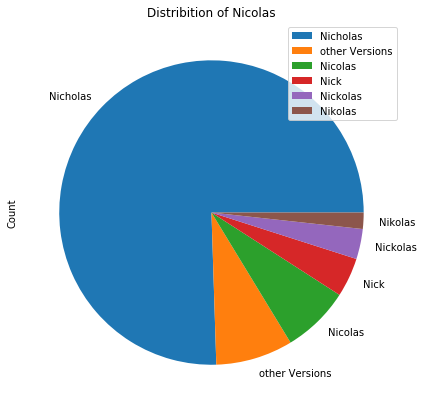

In [11]:
NiFinal2.plot.pie(y='Count', figsize=(7, 7), labels = (NiTopFive) )
plt.legend(NiTopFive) 
plt.title('Distribition of Nicolas')

Text(0.5, 1.0, 'Distribition of Nicolas')

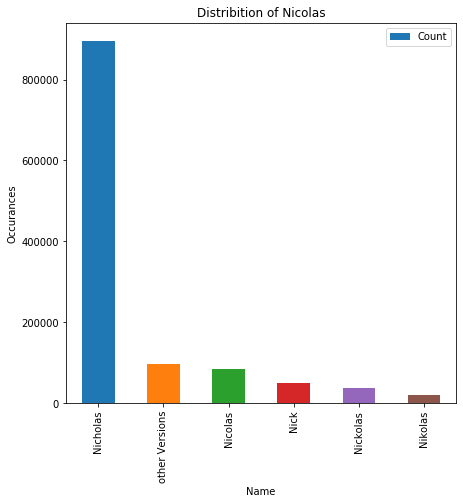

In [12]:
# same as a bar diagramm    
NiFinal2.plot.bar(y='Count', figsize=(7, 7), color=['C0', 'C1', 'C2', 'C3', 'C4', 'C5'])
plt.xticks(np.arange(6), NiTopFive)
plt.xlabel('Name')
plt.ylabel('Occurances')
plt.title('Distribition of Nicolas')

### Occurance of Nicolas in different version

In [13]:
# Top 5 Nic-Nik names
NiTopFiveVector = ['Nicholas',  'Nicolas', 'Nick', 'Nickolas', 'Nikolas']
def Notmatching_ni(fn):
    patternA = r"Nicholas"
    patternB = r"Nicolas"
    patternC = r"Nick"
    patternD = r"Nickolas"
    patternE = r"Nikolas"
    NiTopFiveVector = [patternA ,patternB, patternC, patternD, patternE ]
    NiTopFiveVector2 = '|'.join(NiTopFiveVector)
#    print(nivector2)
    if re.match(NiTopFiveVector2,fn):
        return False
    else:
        return True 

    # both sexes
#NiData_all = NiData_m[NiData_m['FirstName'].apply(Notmatching_ni)]
Ni_otherVer = NiData_m[NiData_m['FirstName'].apply(Notmatching_ni)]
Ni_otherVer_2 = Ni_otherVer.groupby('Year')[['Count']].sum()
Ni_otherVer_2['FirstName'] = "other Versions"
Ni_otherVer_2 = Ni_otherVer_2.reset_index()
Ni_otherVer_2.head(5)

,Year,Count,FirstName
0,1908,6,other Versions
1,1910,5,other Versions
2,1911,6,other Versions
3,1912,17,other Versions
4,1913,20,other Versions


#### Occurrance of all versions of Nic/Nik over time

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik')

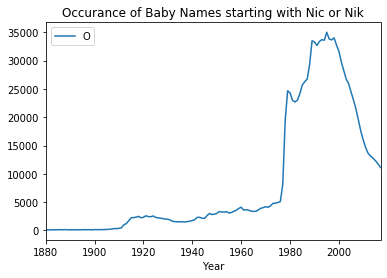

In [14]:
#All Ni
Ni_sum = NiData_m.groupby('Year')[['Count']].sum()
Ni_sum2 = Ni_sum.reset_index()
#Ni_sum2.tail(10)
Ni_sum2.plot.line('Year', 'Count')
plt.legend('Occurance')
plt.title('Occurance of Baby Names starting with Nic or Nik')


#### Occurrance of Top 5 Nic/Nik and other Versions over time

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik')

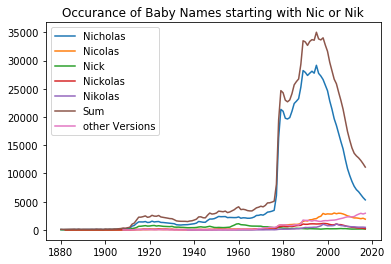

In [15]:
# Top 5 Nic-Nik names
All_Ni_Name = NiTopFiveVector + ['Sum'] + ['other Versions']  
for n in NiTopFiveVector:
  #  NiName =a NiTopFiveVector[n]
    NiDF = NiData_m[NiData_m['FirstName']== n ]
    plt.plot(NiDF['Year'], NiDF['Count'].values )
    #NiData.append(NiDF)
plt.plot(Ni_sum2['Year'], Ni_sum2['Count'].values)   
plt.plot(Ni_otherVer_2['Year'], Ni_otherVer_2['Count'])
#lt.plot(Ni_otherVer_2['Year'], Ni_otherVer_2['Count'].values)
plt.legend(All_Ni_Name)
plt.title('Occurance of Baby Names starting with Nic or Nik')

There seems to be a break inn the time series between 1970 and 1980 which caused a a masssive increase in the name 
Neiter Chow-test nor Quandt-likelihood test avaialble in python.... however given that curve is that steep

#### Occurrance of other Versions of Nicolas (i.e. not top 5 versions)

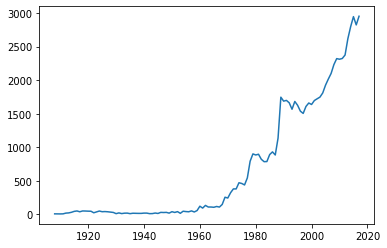

In [16]:
Ni_otherVer_2.reset_index(inplace = True)
Ni_otherVer_2.iloc[90:120,:]

# percentage change of others 
plt.plot(Ni_otherVer_2['Year'], Ni_otherVer_2['Count'])

### Percentage Change

Text(0.5, 1.0, 'Sum')

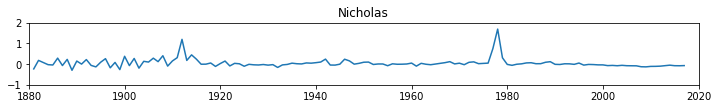

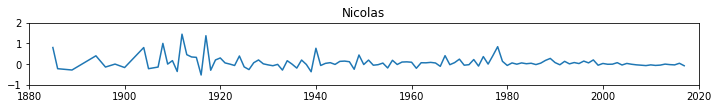

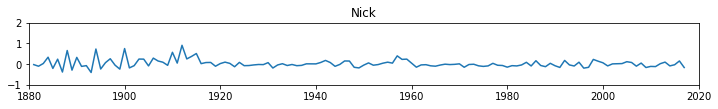

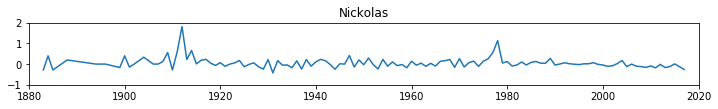

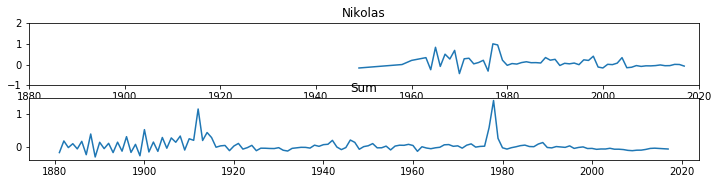

In [17]:
NicPerCent = Ni_sum2['Count'].pct_change()
for i,n in enumerate(NiTopFiveVector):
  #  NiName = NiTopFiveVector[n]
    NiDF = NiData_m[NiData_m['FirstName']== n ]
    NiDFPerCent = NiDF['Count'].pct_change()
    plt.figure(figsize=(12,8) )
    plt.subplot(6,1,i+1)
    plt.axis([ 1880, 2020,-1, 2])
    plt.plot(NiDF['Year'],NiDFPerCent.values   )
    plt.title(NiTopFiveVector[i]) 
plt.subplot(6,1,6)
plt.plot(Ni_sum2['Year'], NicPerCent)   
plt.title('Sum')

#### Which Year is the peak of growth in Nicholas?

In [18]:
#max valueof each graph and corresponding Year!!
#Ni_sum2['Count']
#list(NicPerCent.index)
MaxValue = NicPerCent.max()
for i, j in enumerate(NicPerCent.values):
    if j == MaxValue:
        print (i)

98


In [19]:
Ni_sum2.iloc[98,:]

Year      1978
Count    19465
Name: 98, dtype: int64

#### Thus: the Year of the steep increase is 1978


### Percentage of Nic/Nik of US population ( all different versions of Nic/Nik as % of entire population)

In [20]:
#Total births over time
baby_sum = df.groupby('Year')[['Count']].sum()
baby_sum = baby_sum.reset_index()

In [21]:
Ni_sum3 = pd.merge(Ni_sum2,baby_sum, how = 'left', on ='Year')
Ni_sum3['Frequency'] = (Ni_sum3['Count_x']/Ni_sum3['Count_y']) 
Ni_sum3['Percentage'] = (Ni_sum3['Count_x']/Ni_sum3['Count_y'])*100 
# Note taht Count_x refers to the occurance of the letter in a given year, while Count_y is the total number of babies in a given year
Ni_sum3.head(5)

,Year,Count_x,Count_y,Frequency,Percentage
0,1880,113,201484,0.000561,0.056084
1,1881,95,192696,0.000493,0.049300
2,1882,113,221533,0.000510,0.051008
3,1883,112,216946,0.000516,0.051626
4,1884,124,243462,0.000509,0.050932


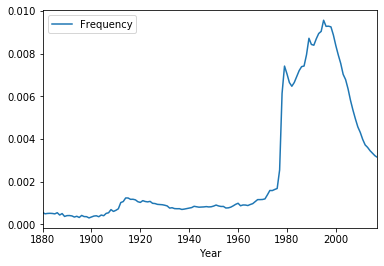

In [22]:
# looking at the relative distribution to check how the name Nicolas 
#normalization
Ni_sum3.plot.line('Year', 'Frequency')

As the Percentage of Nic-Nik is increase, it a very similar shape to the absolute amount, the possiblity that the increase in Name was caused by a population growth can be neglected. Also note that in 1990 Nicolas in different versions 

### check for top 5 male Nic/Nik versions in female data set

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik in female data set')

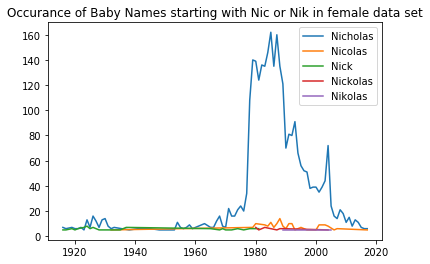

In [23]:
NicNikFemale = []
for n in NiTopFiveVector:
  #  NiName = NiTopFiveVector[n]
    NiDF_f = NiData_f[NiData_f['FirstName']== n ]
    plt.plot(NiDF_f['Year'], NiDF_f['Count'].values )
    NicNikFemale.append(NiDF_f)
#plt.plot(Ni_sum2['Year'], Ni_sum2['Count'].values)   
#plt.plot(Ni_otherVer_2['Year'], Ni_otherVer_2['Count'])
#lt.plot(Ni_otherVer_2['Year'], Ni_otherVer_2['Count'].values)
plt.legend(NiTopFiveVector)
plt.title('Occurance of Baby Names starting with Nic or Nik in female data set')

In [24]:
NicNikFemale[0:20]

[        FirstName Sex  Count  Year
 132897   Nicholas   F      7  1916
 143229   Nicholas   F      6  1917
 163226   Nicholas   F      7  1919
 174270   Nicholas   F      6  1920
 185141   Nicholas   F      6  1921
 ...           ...  ..    ...   ...
 1768530  Nicholas   F     13  2013
 1802863  Nicholas   F     11  2014
 1840169  Nicholas   F      7  2015
 1874869  Nicholas   F      6  2016
 1907505  Nicholas   F      6  2017
 
 [85 rows x 4 columns],         FirstName Sex  Count  Year
 298814    Nicolas   F      5  1932
 853461    Nicolas   F      7  1979
 870444    Nicolas   F     10  1980
 929530    Nicolas   F      9  1983
 949752    Nicolas   F      8  1984
 967652    Nicolas   F     11  1985
 990670    Nicolas   F      7  1986
 1009239   Nicolas   F     10  1987
 1029273   Nicolas   F     14  1988
 1055209   Nicolas   F      8  1989
 1082030   Nicolas   F      6  1990
 1102734   Nicolas   F     10  1991
 1127958   Nicolas   F     10  1992
 1159916   Nicolas   F      5  1993
 12

**State Level Data**   
For a more granular analyiss state level data was investigated, the data was also available on .....
Given that due to safeguarding of privacy, names with fewer than 5 occurrences in any geographic area were exclude, the numbers might not fully match the aggregated data above as one state may have less then five Nicolas.

In [25]:
# import list containing all state data
USstates = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
len(USstates)

51

In [26]:
# Breaking it down on state level
Years = range(1880, 2018, 1)
statedata = []
for u in USstates:
    fn = f'{str(u)}.txt'
#    for y in Years:
    stateDF = pd.read_csv(fn, names = ["Sex",'Year',"FirstName","Count"])
    stateDF['State'] = u
    #statedf['Year'] = y
    statedata.append(stateDF)

stateDF = pd.concat(statedata,ignore_index = True)

stateDF_m = stateDF[stateDF['Sex']== 'M']
stateDF_f = stateDF[stateDF['Sex']== 'F']
stateDF.head(5)

,Sex,Year,FirstName,Count,State
0,F,1910,Mary,875,AL
1,F,1910,Annie,482,AL
2,F,1910,Willie,257,AL
3,F,1910,Mattie,232,AL
4,F,1910,Ruby,204,AL


In [27]:
stateDF_f.tail(5)

,Sex,Year,FirstName,Count,State
5919765,F,2017,Shelby,5,WY
5919766,F,2017,Taylor,5,WY
5919767,F,2017,Violet,5,WY
5919768,F,2017,Vivienne,5,WY
5919769,F,2017,Winter,5,WY


In [28]:
# getting all Nic/nik from country data
def Matching_ni(fn):
    pattern1 = r"^Nic.*"
    pattern2 = r"^Nik.*"
    nivector = [pattern1 ,pattern2]
    nivector2 = '|'.join(nivector)
#    print(nivector2)
    if re.match(nivector2,fn):
        return True
    else:
        return False 
# both sexes
NistateDF_all = stateDF[stateDF['FirstName'].apply(Matching_ni)]
# male
NistateDF_m = stateDF_m[stateDF_m['FirstName'].apply(Matching_ni)]
# female
NistateDF_f = stateDF_f[stateDF_f['FirstName'].apply(Matching_ni)]
#df.apply(re.match(pattern1,df['FirstName']))
NistateDF_all.head(5)

,Sex,Year,FirstName,Count,State
21171,F,1948,Nikki,7,AL
29455,F,1961,Nikki,7,AL
30013,F,1962,Nicole,12,AL
30690,F,1963,Nicole,11,AL
31577,F,1964,Nicole,6,AL


### replicating occurance of different versions of Nicolas with state data

Text(0.5, 1.0, 'Occurance of Baby Names starting with Nic or Nik based on state data')

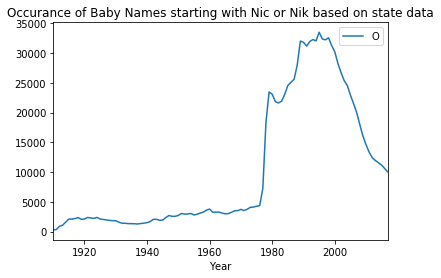

In [29]:
# replicating the graph above
#All Ni
Ni_state_sum = NistateDF_m.groupby('Year')[['Count']].sum()
Ni_state_sum = Ni_state_sum.reset_index()
#Ni_sum2 = Ni_sum.reset_index()
Ni_state_sum.tail(10)
Ni_state_sum.plot.line('Year', 'Count')
plt.legend('Occurance')
plt.title('Occurance of Baby Names starting with Nic or Nik based on state data')

However the curve those resample the one above

### in which states do the females version of male Nic/ Nik occure ?

In [30]:
TopFiveMaleInFemaleSet = []    
NiTopFiveVector = ['Nicholas',  'Nicolas', 'Nick', 'Nickolas', 'Nikolas']
for n in NiTopFiveVector:
    FemaleNi= stateDF_f[stateDF_f['FirstName']== n ]
    TopFiveMaleInFemaleSet.append(FemaleNi)


In [31]:
FemaleNicholas = TopFiveMaleInFemaleSet[0]
FemaleNicholas.sort_values('Year')

,Sex,Year,FirstName,Count,State
3567984,F,1926,Nicholas,5,NY
3568794,F,1927,Nicholas,5,NY
3571000,F,1930,Nicholas,8,NY
3572678,F,1932,Nicholas,5,NY
3593643,F,1954,Nicholas,5,NY
...,...,...,...,...,...
1612639,F,2003,Nicholas,5,IL
3686402,F,2003,Nicholas,8,NY
2108771,F,2004,Nicholas,48,KY
4553141,F,2008,Nicholas,8,PA


In [32]:
FemaleNicholas.sort_values('Count', ascending = False).head(10)

,Sex,Year,FirstName,Count,State
2108771,F,2004,Nicholas,48,KY
498272,F,1993,Nicholas,27,CA
462729,F,1982,Nicholas,26,CA
494681,F,1992,Nicholas,23,CA
483609,F,1989,Nicholas,23,CA
468393,F,1984,Nicholas,19,CA
477231,F,1987,Nicholas,19,CA
457639,F,1980,Nicholas,18,CA
465692,F,1983,Nicholas,18,CA
491275,F,1991,Nicholas,16,CA


### sampling inspection

#### KY 

In [33]:
FemaleNicholas[FemaleNicholas['State']=='KY']

,Sex,Year,FirstName,Count,State
2108771,F,2004,Nicholas,48,KY


In [34]:
NiKYDF_m = NistateDF_m[NistateDF_m['State']=='KY']
NicholasKY = NiKYDF_m[NiKYDF_m['FirstName']=='Nicholas'] 
NicholasKY.iloc[75:85,:]

,Sex,Year,FirstName,Count,State
2159858,M,1998,Nicholas,341,KY
2160348,M,1999,Nicholas,328,KY
2160856,M,2000,Nicholas,337,KY
2161400,M,2001,Nicholas,295,KY
2161930,M,2002,Nicholas,298,KY
2162491,M,2003,Nicholas,250,KY
2163065,M,2004,Nicholas,185,KY
2163765,M,2005,Nicholas,193,KY
2164359,M,2006,Nicholas,206,KY
2164992,M,2007,Nicholas,194,KY


#### CA

In [35]:
FemaleNicholas[FemaleNicholas['State']=='CA'].sort_values('Count', ascending = False).head(10)

,Sex,Year,FirstName,Count,State
498272,F,1993,Nicholas,27,CA
462729,F,1982,Nicholas,26,CA
483609,F,1989,Nicholas,23,CA
494681,F,1992,Nicholas,23,CA
477231,F,1987,Nicholas,19,CA
468393,F,1984,Nicholas,19,CA
457639,F,1980,Nicholas,18,CA
465692,F,1983,Nicholas,18,CA
491275,F,1991,Nicholas,16,CA
452705,F,1978,Nicholas,16,CA


In [36]:
NiCADF_m = NistateDF_m[NistateDF_m['State']=='CA']
NicholasCA = NiCADF_m[NiCADF_m['FirstName']=='Nicholas'] 
NicholasCA.iloc[71:85,:]

,Sex,Year,FirstName,Count,State
656008,M,1982,Nicholas,2226,CA
657835,M,1983,Nicholas,2283,CA
659684,M,1984,Nicholas,2453,CA
661562,M,1985,Nicholas,2632,CA
663526,M,1986,Nicholas,2654,CA
665587,M,1987,Nicholas,2671,CA
667703,M,1988,Nicholas,3075,CA
669950,M,1989,Nicholas,3276,CA
672356,M,1990,Nicholas,3466,CA
674874,M,1991,Nicholas,3200,CA


#### the female Nicholas do occure when there are also male Nicholas. Thus there are either girls named Nicholas or some counties in KY and CA messed up the gender

### states with the biggest increase in Nic/Nik in 1978

In [37]:
Ni1977DF_m = NistateDF_m[NistateDF_m['Year']== 1977]
Nicholas1977 = Ni1977DF_m[Ni1977DF_m['FirstName']=='Nicholas'] 
Nicholas1977.sort_values(by=['Count'], ascending=False).head(10)

,Sex,Year,FirstName,Count,State
647908,M,1977,Nicholas,674,CA
3776725,M,1977,Nicholas,523,NY
1682574,M,1977,Nicholas,402,IL
4211861,M,1977,Nicholas,370,OH
4608845,M,1977,Nicholas,326,PA
2731460,M,1977,Nicholas,308,MI
5879417,M,1977,Nicholas,247,WI
2858923,M,1977,Nicholas,226,MN
5253616,M,1977,Nicholas,210,TX
3444501,M,1977,Nicholas,208,NJ


In [38]:
Nicholas1977['Count'].sum()

6081

In [39]:
Ni1978DF_m = NistateDF_m[NistateDF_m['Year']== 1978]
Nicholas1978 = Ni1978DF_m[Ni1978DF_m['FirstName']=='Nicholas'] 
Nicholas1978.sort_values(by=['Count'], ascending=False).head(10)

,Sex,Year,FirstName,Count,State
649384,M,1978,Nicholas,1764,CA
3777984,M,1978,Nicholas,1049,NY
4212603,M,1978,Nicholas,1039,OH
1683531,M,1978,Nicholas,975,IL
2732202,M,1978,Nicholas,891,MI
4609552,M,1978,Nicholas,733,PA
5254775,M,1978,Nicholas,710,TX
5879854,M,1978,Nicholas,688,WI
1841081,M,1978,Nicholas,570,IN
2859305,M,1978,Nicholas,562,MN


In [40]:
Nicholas1978['Count'].sum()

16354

In [41]:
Ni1979DF_m = NistateDF_m[NistateDF_m['Year']== 1979]
Nicholas1979 = Ni1979DF_m[Ni1979DF_m['FirstName']=='Nicholas'] 
Nicholas1979.sort_values(by=['Count'], ascending=False).head(10)

,Sex,Year,FirstName,Count,State
650901,M,1979,Nicholas,2081,CA
4213344,M,1979,Nicholas,1389,OH
1684520,M,1979,Nicholas,1369,IL
2732944,M,1979,Nicholas,1260,MI
3779257,M,1979,Nicholas,1256,NY
5880289,M,1979,Nicholas,915,WI
4610290,M,1979,Nicholas,911,PA
5256023,M,1979,Nicholas,883,TX
2859700,M,1979,Nicholas,759,MN
1841621,M,1979,Nicholas,705,IN


In [42]:
Nicholas1979['Count'].sum()

21344

#### The reason for this might be....






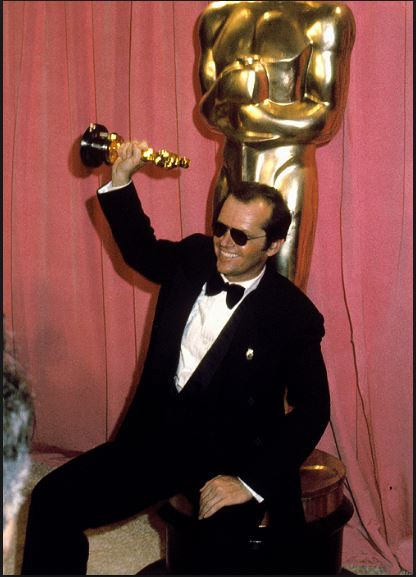

In [43]:
#



Image(filename = "Nicholson_Oscar.jpg")  
#copy rights : https://www.pinterest.de/pin/11962755237172667/

#### Jack Nicholson wins Oscar in 1976